In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

path = r"C:\Users\Nefi\OneDrive\Documentos\09-EBAC\Python\Referencia\Indicators.csv"

df = pd.read_csv(path, encoding="latin1")

df.head()

,AreaCode,Region/Country/Area,Year,Series,Value,Footnotes,Source
0,1,"Total, all countries or areas",2010,Population annual rate of increase (percent),1.3,NaN,"United Nations Population Division, New York, ..."
1,1,"Total, all countries or areas",2010,Total fertility rate (children per women),2.6,NaN,"United Nations Population Division, New York, ..."
2,1,"Total, all countries or areas",2010,"Infant mortality for both sexes (per 1,000 liv...",37.1,NaN,"United Nations Statistics Division, New York, ..."
3,1,"Total, all countries or areas",2010,"Maternal mortality ratio (deaths per 100,000 p...",254,NaN,"World Health Organization (WHO), the United Na..."
4,1,"Total, all countries or areas",2010,Life expectancy at birth for both sexes (years),70.1,NaN,"United Nations Population Division, New York, ..."


In [2]:
# Exploración rápida
print(df.shape)
print(df.columns.tolist())
print(df.head())
print(df.info())

(6756, 7)
['AreaCode', 'Region/Country/Area', 'Year', 'Series', 'Value', 'Footnotes', 'Source']
   AreaCode            Region/Country/Area  Year  \
0         1  Total, all countries or areas  2010   
1         1  Total, all countries or areas  2010   
2         1  Total, all countries or areas  2010   
3         1  Total, all countries or areas  2010   
4         1  Total, all countries or areas  2010   

                                              Series Value Footnotes  \
0       Population annual rate of increase (percent)   1.3       NaN   
1          Total fertility rate (children per women)   2.6       NaN   
2  Infant mortality for both sexes (per 1,000 liv...  37.1       NaN   
3  Maternal mortality ratio (deaths per 100,000 p...   254       NaN   
4    Life expectancy at birth for both sexes (years)  70.1       NaN   

                                              Source  
0  United Nations Population Division, New York, ...  
1  United Nations Population Division, New York,

In [5]:
df_inf = df[
    df["Series"].str.contains("Infant mortality", case=False, na=False)
    & (df["Year"] == 2020)
]

df_life = df[
    df["Series"].str.contains("Life expectancy at birth", case=False, na=False)
    & (df["Year"] == 2020)
]

print(df_inf.head())
print(df_life.head())
print(df_inf.shape, df_life.shape)

     AreaCode            Region/Country/Area  Year  \
16          1  Total, all countries or areas  2020   
43          2                         Africa  2020   
70         15                Northern Africa  2020   
97        202             Sub-Saharan Africa  2020   
124        14                 Eastern Africa  2020   

                                                Series Value Footnotes  \
16   Infant mortality for both sexes (per 1,000 liv...  28.3       NaN   
43   Infant mortality for both sexes (per 1,000 liv...  46.4       NaN   
70   Infant mortality for both sexes (per 1,000 liv...  22.6       NaN   
97   Infant mortality for both sexes (per 1,000 liv...    50       NaN   
124  Infant mortality for both sexes (per 1,000 liv...  38.3       NaN   

                                                Source  
16   United Nations Statistics Division, New York, ...  
43   United Nations Statistics Division, New York, ...  
70   United Nations Statistics Division, New York, ...  
97

In [6]:
df_merge = df_inf.merge(
    df_life,
    on=["Region/Country/Area", "Year"], 
    suffixes=("_infant", "_life")
)

In [8]:
df_clean = df_merge[[
    "Region/Country/Area",
    "Year",
    "Value_infant",
    "Value_life"
]]

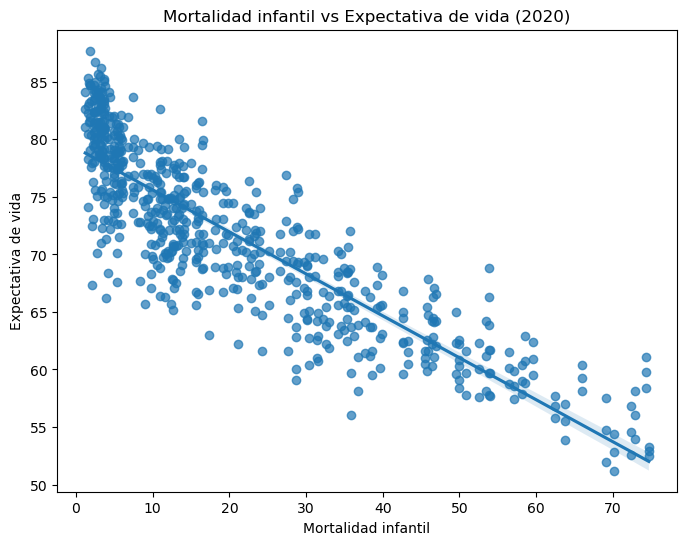

In [18]:
# Conversión de valores en cadena a valores numéricos para poder graficar
df_clean['Value_infant'] = pd.to_numeric(df_clean['Value_infant'], errors='coerce')
df_clean['Value_life'] = pd.to_numeric(df_clean['Value_life'], errors='coerce')

# Eliminación de valores NaN de la convesión
df_clean = df_clean.dropna(subset=['Value_infant', 'Value_life'])

# Gráfica
plt.figure(figsize=(8,6))
sns.regplot(
    data=df_clean,
    x="Value_infant",
    y="Value_life",
    scatter_kws={"alpha":0.7}
)
plt.title("Mortalidad infantil vs Expectativa de vida (2020)")
plt.xlabel("Mortalidad infantil")
plt.ylabel("Expectativa de vida")
plt.show()

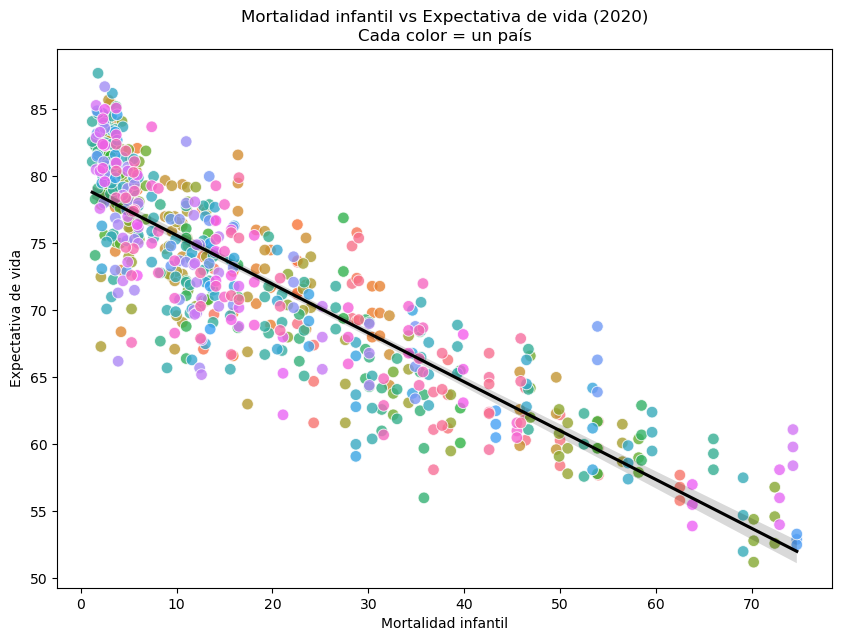

In [19]:
plt.figure(figsize=(10,7))
sns.scatterplot(
    data=df_clean,
    x="Value_infant",
    y="Value_life",
    hue="Region/Country/Area",
    alpha=0.8,
    s=70,
    legend=False
)

sns.regplot(
    data=df_clean,
    x="Value_infant",
    y="Value_life",
    scatter=False,
    color="black"
)

plt.title("Mortalidad infantil vs Expectativa de vida (2020)\nCada color = un país")
plt.xlabel("Mortalidad infantil")
plt.ylabel("Expectativa de vida")
plt.show()